In [1]:
from keras.datasets import imdb
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models

In [5]:
from keras.preprocessing.sequence import pad_sequences

# Load the data
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# Pad or truncate sequences to a fixed length
max_length = 100  # Define your desired sequence length
X_train_padded = pad_sequences(X_train, maxlen=max_length)
X_test_padded = pad_sequences(X_test, maxlen=max_length)

# Concatenate padded sequences
X = np.concatenate((X_train_padded, X_test_padded), axis=0)
y = np.concatenate((y_train, y_test), axis=0)


In [6]:
##training data shape review
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))

Training data: 
(50000, 100)
(50000,)
Classes: 
[0 1]


In [7]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
64774


Review length: 
Mean 100.00 words (0.000000)


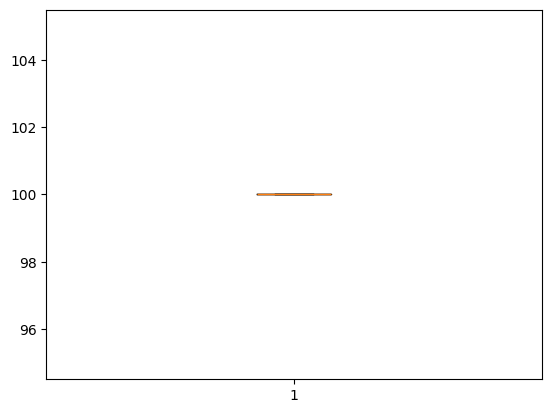

In [8]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [10]:
def vectorize_sequences(sequences, dimension=5000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [11]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - acc: 0.6865 - loss: 0.6057 - val_acc: 0.8650 - val_loss: 0.3442
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8993 - loss: 0.2778 - val_acc: 0.8849 - val_loss: 0.2852
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9326 - loss: 0.1915 - val_acc: 0.8824 - val_loss: 0.2943
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9477 - loss: 0.1521 - val_acc: 0.8778 - val_loss: 0.3207
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9576 - loss: 0.1257 - val_acc: 0.8709 - val_loss: 0.3541
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9671 - loss: 0.1038 - val_acc: 0.8693 - val_loss: 0.3725
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9782 - loss: 0.0799 - val_acc: 0.8674 - val_loss: 0.4114
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9835 - loss: 0.0640 - val_acc: 0.8632 - val_loss: 0.4487
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9898

In [17]:
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

The Dense Convolutional Neural Network 1 layer took 10.4945 seconds to train.


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

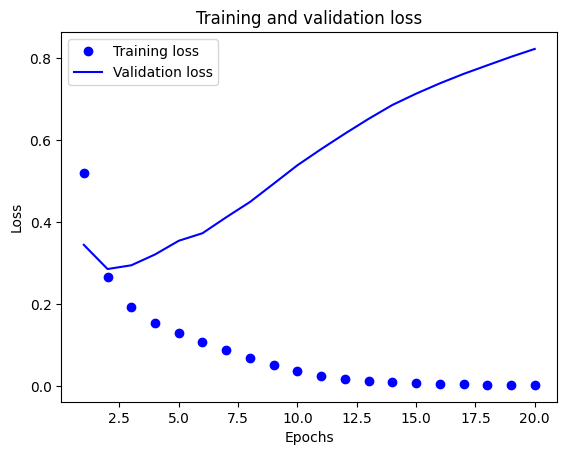

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

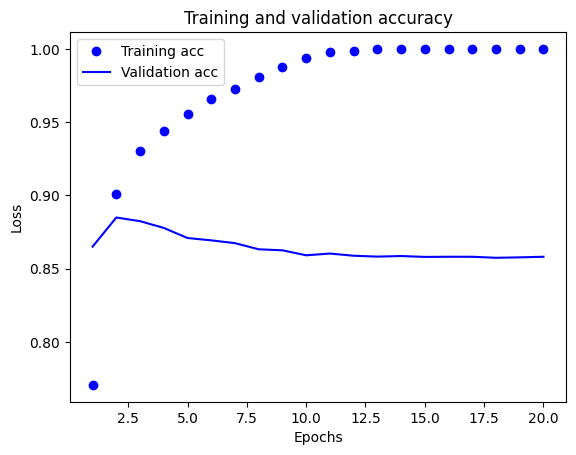

In [20]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         160,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,365 (1.84 MB)

 Trainable params: 161,121 (629.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,244 (1.23 MB)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)

#accuracy
accuracy_score(y_test,classes_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

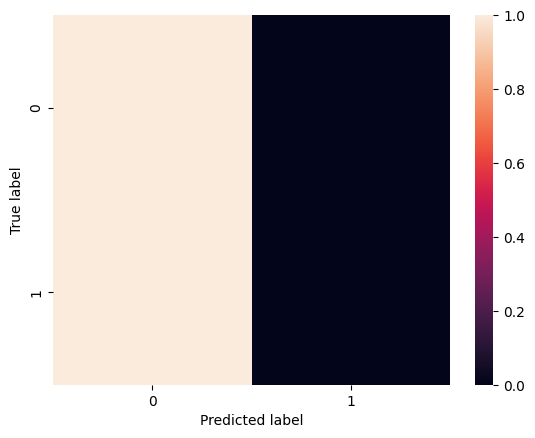

In [23]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [24]:
#Dense with Two Layer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2

print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.6558 - loss: 0.6395 - val_acc: 0.8541 - val_loss: 0.3664
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8942 - loss: 0.2938 - val_acc: 0.8846 - val_loss: 0.2867
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9307 - loss: 0.1911 - val_acc: 0.8810 - val_loss: 0.3029
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9456 - loss: 0.1558 - val_acc: 0.8744 - val_loss: 0.3354
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9602 - loss: 0.1178 - val_acc: 0.8682 - val_loss: 0.3815
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9674 - loss: 0.1016 - val_acc: 0.8642 - val_loss: 0.4323
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9727 - loss: 0.0830 - val_acc: 0.8608 - val_loss: 0.4818
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9801 - loss: 0.0649 - val_acc: 0.8568 - val_loss: 0.5308
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9841

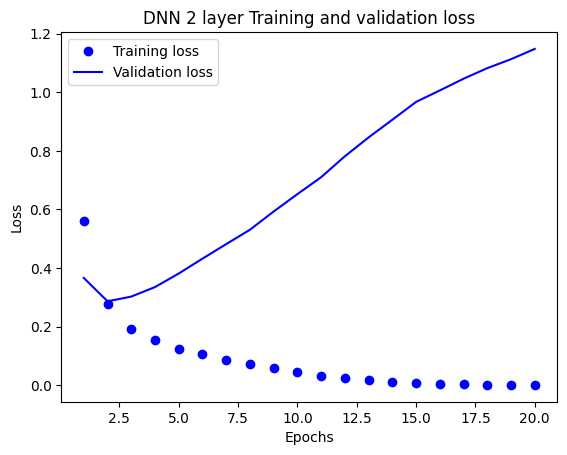

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

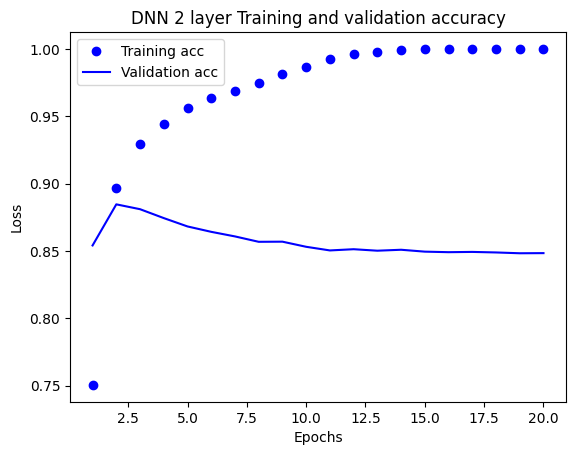

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │         160,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,533 (1.86 MB)

 Trainable params: 162,177 (633.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324,356 (1.24 MB)

In [30]:
from numpy.ma.core import argmax
pred = model2.predict(x_test)
classes_x=argmax(pred,axis=-1)
#accuracy
accuracy_score(y_test,classes_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


0.5